# get_netlist

Any component can extract its netlist dict with `get_netlist`

While `gf.read.from_yaml` converts a `YAML Dict` into a `Component`

`get_netlist` converts `Component` into a `Dict`

In [1]:
from omegaconf import OmegaConf
import gdsfactory as gf

2022-11-27 23:45:57.936 | INFO     | gdsfactory.config:<module>:46 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.2.6


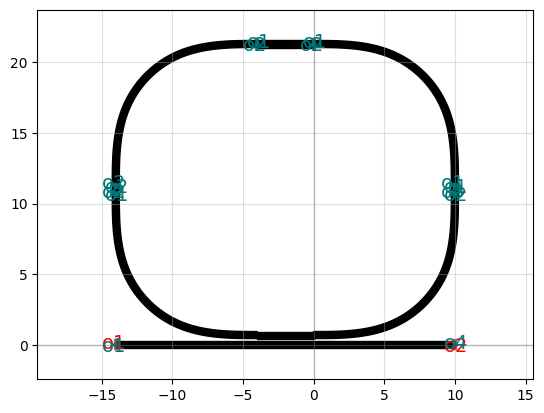

ring_single: uid f9dc8c9a, ports ['o2', 'o1'], references ['coupler_ring_1', 'straight_1', 'straight_2', 'bend_euler_1', 'bend_euler_2', 'straight_3'], 0 polygons

In [2]:
c = gf.components.ring_single()
c

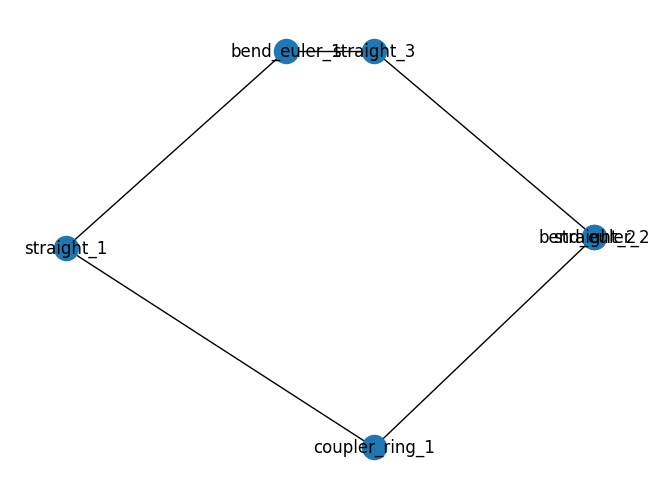

In [3]:
c.plot_netlist()

In [4]:
n = c.get_netlist()

In [5]:
c.write_netlist("ring.yml")

In [6]:
n = OmegaConf.load("ring.yml")

In [7]:
i = list(n["instances"].keys())
i

['bend_euler_1',
 'bend_euler_2',
 'coupler_ring_1',
 'straight_1',
 'straight_2',
 'straight_3']

In [8]:
instance_name0 = i[0]

In [9]:
n["instances"][instance_name0]["settings"]

{'radius': 10.0}

## Instance names

By default get netlist names each `instance` with the name of the `reference`

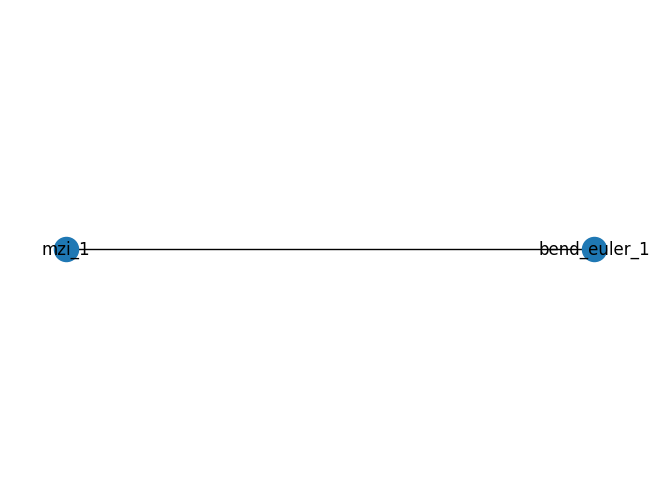

In [10]:
@gf.cell
def mzi_with_bend_automatic_naming():
    c = gf.Component()
    mzi = c.add_ref(gf.components.mzi())
    bend = c.add_ref(gf.components.bend_euler())
    bend.connect("o1", mzi.ports["o2"])
    return c


c = mzi_with_bend_automatic_naming()
c.plot_netlist()

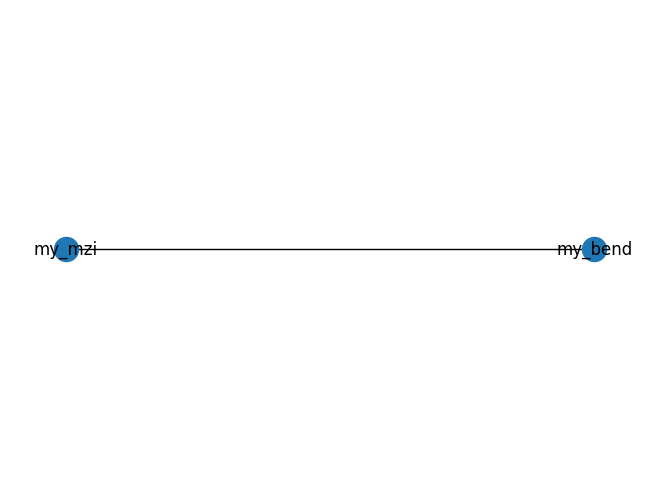

In [11]:
@gf.cell
def mzi_with_bend_deterministic_names_using_alias():
    c = gf.Component()
    mzi = c.add_ref(gf.components.mzi(), alias="my_mzi")
    bend = c.add_ref(gf.components.bend_euler(), alias="my_bend")
    bend.connect("o1", mzi.ports["o2"])
    return c


c = mzi_with_bend_deterministic_names_using_alias()
c.plot_netlist()

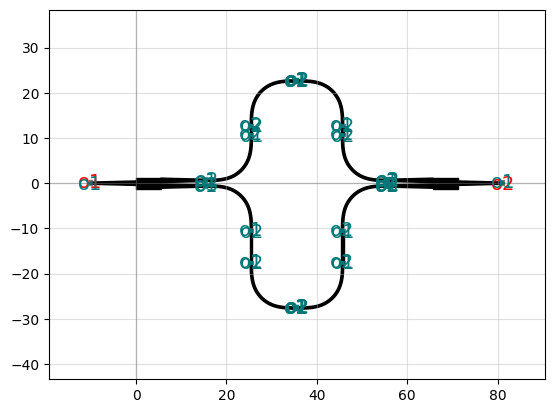

mzi: uid 87312efa, ports ['o1', 'o2'], references ['bend_euler_1', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'straight_5', 'straight_6', 'straight_7', 'bend_euler_7', 'bend_euler_8', 'straight_8', 'straight_9', 'straight_10', 'sytl', 'syl', 'sxt', 'sxb', 'cp1', 'cp2'], 0 polygons

In [12]:
c = gf.components.mzi()
c

In [13]:
c = gf.components.mzi()
n = c.get_netlist()
print(c.get_netlist().keys())

dict_keys(['connections', 'instances', 'placements', 'ports', 'name'])


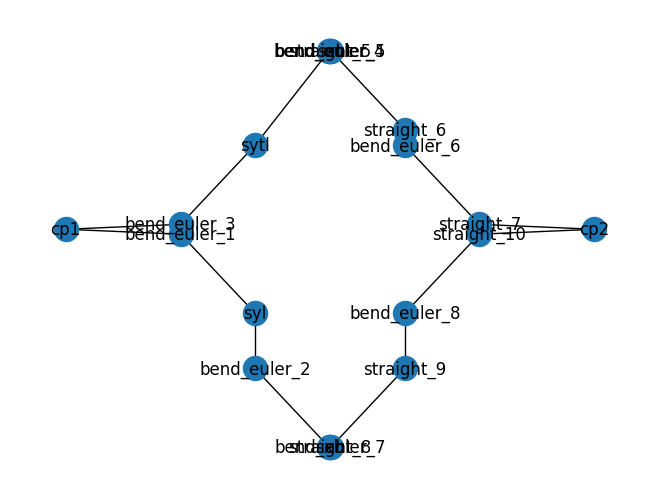

In [14]:
c.plot_netlist()

In [15]:
n.keys()

dict_keys(['connections', 'instances', 'placements', 'ports', 'name'])

## warnings

Lets make a connectivity **error**, for example connecting ports on the wrong layer

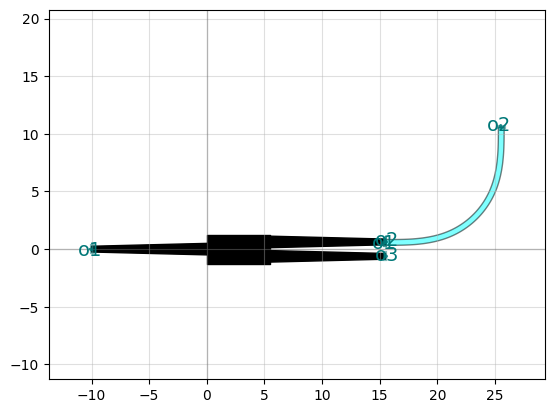

mmi_with_bend: uid 40f5aaf4, ports [], references ['mmi', 'bend'], 0 polygons

In [16]:
@gf.cell
def mmi_with_bend():
    c = gf.Component()
    mmi = c.add_ref(gf.components.mmi1x2(), alias="mmi")
    bend = c.add_ref(gf.components.bend_euler(layer=(2, 0)), alias="bend")
    bend.connect("o1", mmi.ports["o2"])
    return c


c = mmi_with_bend()
c

In [17]:
n = c.get_netlist()

In [18]:
print(n["warnings"])

{'optical': {'unconnected_ports': [{'ports': ['mmi,o1', 'mmi,o3', 'bend,o2'], 'values': [[-10.0, 0.0], [15.5, -0.625], [25.5, 10.625]], 'message': '3 unconnected optical ports!'}]}}


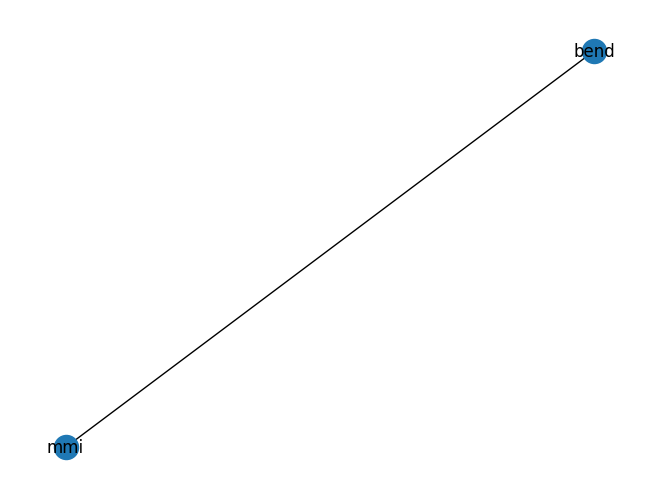

In [19]:
c.plot_netlist()

## get_netlist_recursive

When you do `get_netlist()` for a component it will only show connections for the instances that belong to that component.
So despite having a lot of connections, it will show only the meaningful connections for that component.
For example, a ring has a ring_coupler. If you want to dig deeper, the connections that made that ring coupler are still available.

`get_netlist_recursive()` returns a recursive netlist.

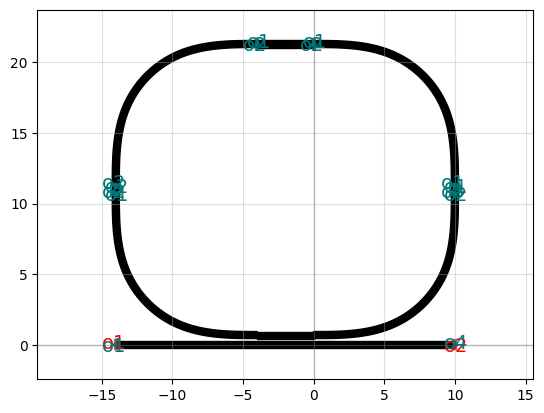

ring_single: uid f9dc8c9a, ports ['o2', 'o1'], references ['coupler_ring_1', 'straight_1', 'straight_2', 'bend_euler_1', 'bend_euler_2', 'straight_3'], 0 polygons

In [20]:
c = gf.components.ring_single()
c

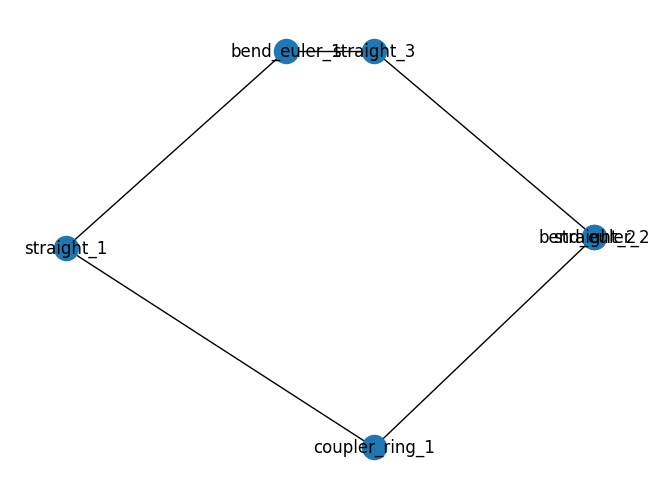

In [21]:
c.plot_netlist()

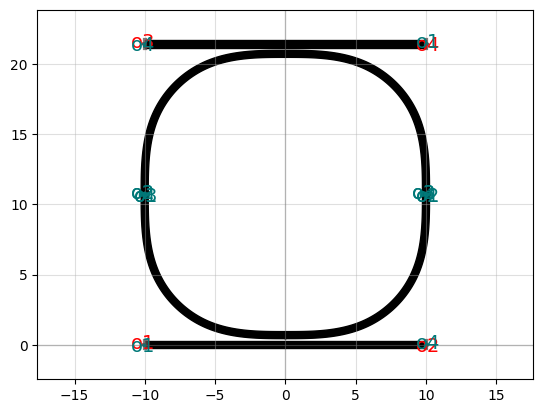

ring_double: uid 33fc4a6a, ports ['o1', 'o2', 'o3', 'o4'], references ['coupler_ring_1', 'coupler_ring_2', 'straight_1', 'straight_2'], 0 polygons

In [22]:
c = gf.components.ring_double()
c

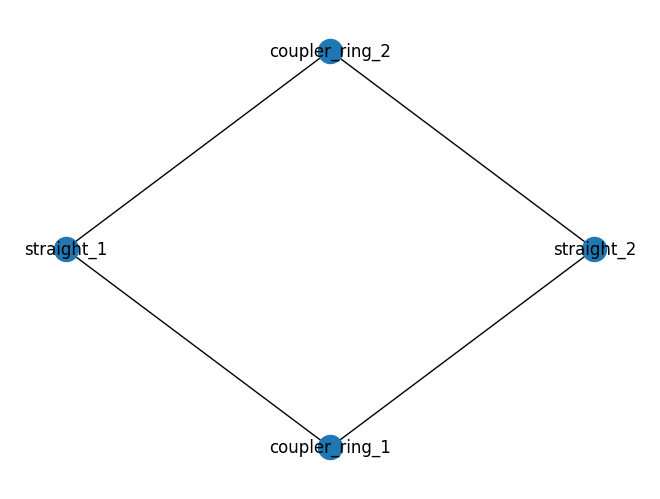

In [23]:
c.plot_netlist()

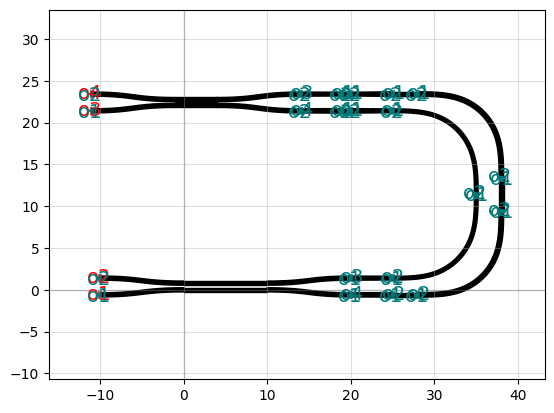

mzit: uid 82326ba5, ports ['o4', 'o3', 'o2', 'o1'], references ['coupler_1', 'taper_1', 'bend_euler_1', 'bend_euler_2', 'taper_2', 'straight_1', 'taper_3', 'taper_4', 'straight_2', 'bend_euler_3', 'bend_euler_4', 'straight_3', 'straight_4', 'taper_5', 'straight_5', 'taper_6', 'coupler_2'], 0 polygons

In [24]:
c = gf.components.mzit()
c

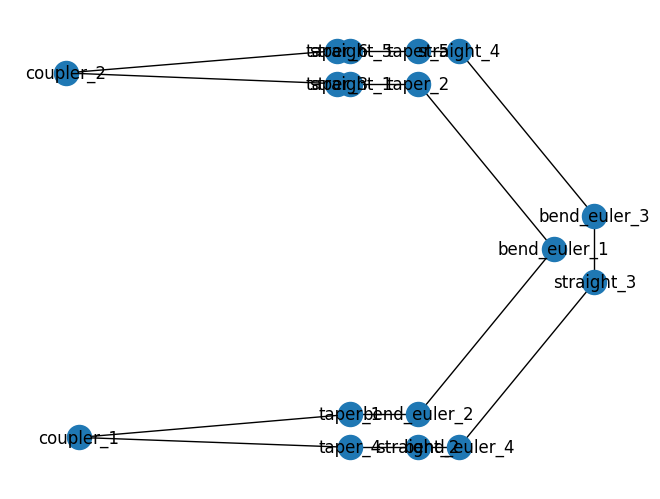

In [25]:
c.plot_netlist()

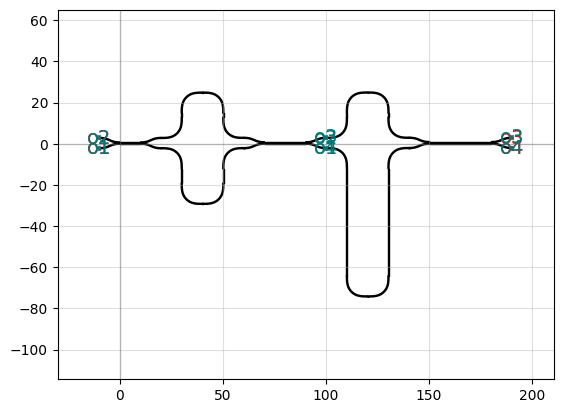

mzi_lattice_3b4b99d8: uid 43e70489, ports ['o1', 'o2', 'o3', 'o4'], references ['mzi_1', 'mzi_2'], 0 polygons

In [26]:
import gdsfactory as gf

coupler_lengths = [10, 20, 30]
coupler_gaps = [0.1, 0.2, 0.3]
delta_lengths = [10, 100]

c = gf.components.mzi_lattice(
    coupler_lengths=coupler_lengths,
    coupler_gaps=coupler_gaps,
    delta_lengths=delta_lengths,
)
c

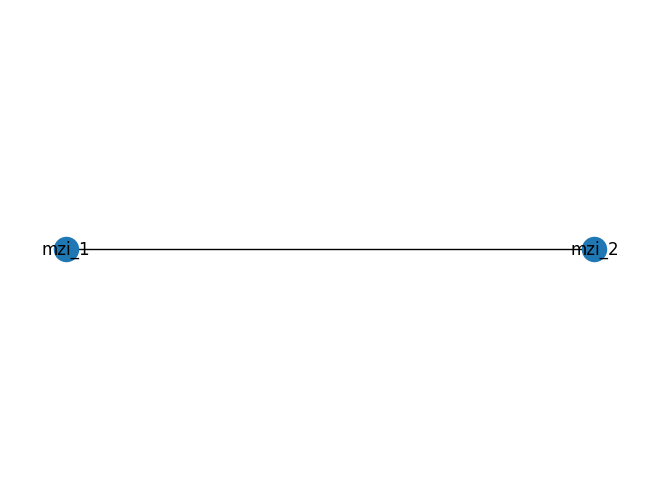

In [27]:
c.plot_netlist()

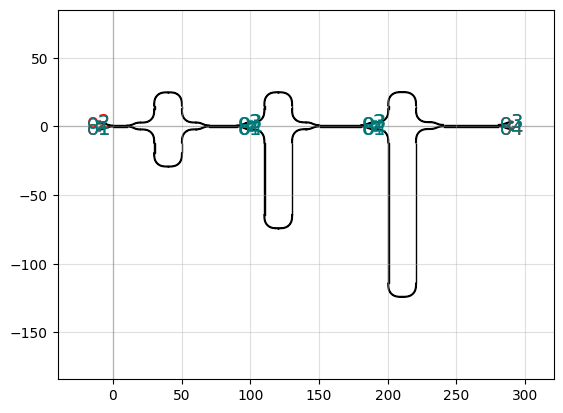

mzi_lattice_d52c1fad: uid 7e6ffc44, ports ['o1', 'o2', 'o3', 'o4'], references ['mzi_1', 'mzi_2', 'mzi_3'], 0 polygons

In [28]:
coupler_lengths = [10, 20, 30, 40]
coupler_gaps = [0.1, 0.2, 0.4, 0.5]
delta_lengths = [10, 100, 200]

c = gf.components.mzi_lattice(
    coupler_lengths=coupler_lengths,
    coupler_gaps=coupler_gaps,
    delta_lengths=delta_lengths,
)
c

In [29]:
n = c.get_netlist()

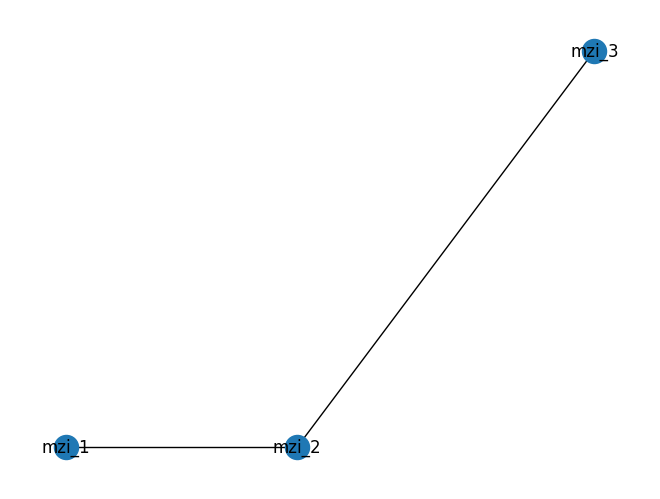

In [30]:
c.plot_netlist()

In [31]:
n_recursive = c.get_netlist_recursive()

In [32]:
n_recursive.keys()

dict_keys(['mzi_lattice_d52c1fad', 'mzi_d26ee7a9', 'mzi_98cc9bb3', 'mzi_ee2873e6'])